In [1]:
import pandas as pd
import numpy as np
import pickle
import json
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from adjustText import adjust_text

data_dir_yt = "./youtube/data/"
data_dir_tt = "./tiktok-opinion-dynamics/src/tiktok_opinion_dynamics/data/"

In [2]:
dictionary_channelid = {"unclimatechange": "UCuLEr-GWiwCBB6zBDX3elOQ",
                        #"natgeo": "UCpVm7bg6pXKo1Pr6k5kxG9A",
                        #"nbcnews": "UCeY0bbntWzzVIaj2z3QigXg",
                        "bbcnews": "UC16niRr50-MSBwiO3YDb3RA",
                        "climateadam": "UCCu5wtZ5uOWZp_roz7wHPfg",
                        "drgilbz": "UCjaBxCyjLpIRyKOd8uw_S4w",
                        "dwplaneta": "UCb72Gn5LXaLEcsOuPKGfQOg",
                        "extinctionrebellionxr": "UCYThdLKE6TDwBJh-qDC6ICA",
                        "greenpeace_international": "UCTDTSx8kbxGECZJxOa9mIKA",
                        "guardian": "UCHpw8xwDNhU9gdohEcJu4aA",
                        "ourchangingclimate": "UCNXvxXpDJXp-mZu3pFMzYHQ",
                        "ted": "UCAuUUnT6oDeKwE6v1NGQxug"}   

dictionary_channelid_2 = {"juststopoil": "UC-t4U1Azf8AOkCBJILSNBmw",
                        "minuteearth": "UCeiYXex_fwgYDonaTcSIk6w",
                        "metoffices": "UC40Tw2tFuMzK305mi7nj8rg",
                        "zahrabiabani": "UCuRimTRSnyVlSrN4aQVCCkA",   
                        #"declareemergency": "UCi2pVvNv5s_Nh4KipoGQXxQ",
                        #"thereviveseries": "UCvpfvQqheuQRZiVjiSh71sw",
                        #"climatt": "UCoSRNBi6F4jN0CYq-sRcOHQ",
                        "rupertread": "UCm7-jS-VzbR3xEqpBGYDPcQ",
                        "friendsoftheearth": "UC9qqyIuIUoRKTG6sE5rVlhg",
                        "parleychannel": "UCieB62vq-5QByMIcq-LMntg",
                        "actionfortheclimate": "UCbewlkCKbV1B3xmKwXa1qsA",
                        "piqueaction": "UCNf0NVrB9U8YF5sFpbsME4A",
                        "margreen": "UCUDFVYGkosHtan3lGnQttew",
                        "nowthisearth": "UCFH5dQAkGIqzcFYmM4tNtXw"}  

# merge dictionaries
dictionary_channelid.update(dictionary_channelid_2)

In [3]:
list_popularity = []
for creator in dictionary_channelid.keys():
    
    print("Creator:", creator)
    
    with open(data_dir_yt+"{}_transcript_2021-2023_newkeys.pkl".format(creator), "rb") as f:
        df_yt = pickle.load(f)
        
    with open(data_dir_tt+"search/creators/all_keywords_"+creator+"_2021-2023.pkl", "rb") as f:
        df_tt = pickle.load(f)

    # video views to int
    df_yt["Video Views"] = df_yt["Video Views"].astype(int)
    df_tt["view_count"] = df_tt["view_count"].astype(int)

    # given the Video Views, get average value for the creator
    avg_views_yt = df_yt["Video Views"].mean()
    avg_views_tt = df_tt["view_count"].mean()

    # get total views for each creator
    total_views_yt = df_yt["Video Views"].sum()
    total_views_tt = df_tt["view_count"].sum()

    list_popularity.append([creator, avg_views_yt, avg_views_tt, total_views_yt, total_views_tt, len(df_yt), len(df_tt)])


df_popularity = pd.DataFrame(list_popularity, columns=["creator", "avg_views_yt", "avg_views_tt", "total_views_yt", "total_views_tt", "num_videos_yt", "num_videos_tt"])
df_popularity


Creator: unclimatechange
Creator: bbcnews
Creator: climateadam
Creator: drgilbz
Creator: dwplaneta
Creator: extinctionrebellionxr
Creator: greenpeace_international
Creator: guardian
Creator: ourchangingclimate
Creator: ted
Creator: juststopoil
Creator: minuteearth
Creator: metoffices
Creator: zahrabiabani
Creator: rupertread
Creator: friendsoftheearth
Creator: parleychannel
Creator: actionfortheclimate
Creator: piqueaction
Creator: margreen
Creator: nowthisearth


,creator,avg_views_yt,avg_views_tt,total_views_yt,total_views_tt,num_videos_yt,num_videos_tt
0,unclimatechange,10931.787456,306881.500000,3137423,24550520,287,80
1,bbcnews,254129.466934,123736.054054,126810604,4578234,499,37
2,climateadam,10726.649351,6982.348624,825952,761076,77,109
3,drgilbz,6655.891892,566.384615,246268,7363,37,13
4,dwplaneta,398103.649351,84940.166667,61307962,5096410,154,60
5,extinctionrebellionxr,4658.566572,8334.543726,1644474,2191985,353,263
6,greenpeace_international,4775.426829,1088.645833,391585,104510,82,96
7,guardian,149441.108696,36251.140000,6874291,1812557,46,50
8,ourchangingclimate,111222.580952,564.307692,11678371,7336,105,13
9,ted,191822.249097,32879.218182,53134763,1808357,277,55


In [4]:
dict_type_creator = {}  # key: creator, value: type
dict_type_creator["unclimatechange"] = "institution"
dict_type_creator["bbcnews"] = "news"
dict_type_creator["climateadam"] = "science_communicator"
dict_type_creator["drgilbz"] = "science_communicator"
dict_type_creator["dwplaneta"] = "news"
dict_type_creator["extinctionrebellionxr"] = "activist"
dict_type_creator["greenpeace_international"] = "activist"
dict_type_creator["guardian"] = "news"
dict_type_creator["ourchangingclimate"] = "science_communicator"
dict_type_creator["ted"] = "science_communicator"
dict_type_creator["juststopoil"] = "activist"
dict_type_creator["minuteearth"] = "science_communicator"
dict_type_creator["metoffices"] = "institution"
dict_type_creator["zahrabiabani"] = "science_communicator"
dict_type_creator["rupertread"] = "activist"
dict_type_creator["friendsoftheearth"] = "activist"
dict_type_creator["parleychannel"] = "activist"
dict_type_creator["actionfortheclimate"] = "activist"
dict_type_creator["piqueaction"] = "science_communicator"
dict_type_creator["margreen"] = "science_communicator"
dict_type_creator["nowthisearth"] = "news"


In [5]:
# get total view per creator type
list_popularity_type = []
for creator_type in set(dict_type_creator.values()):
    
    print("Creator type:", creator_type)
    
    # get all creators of the type
    list_creators = []
    for creator in dict_type_creator.keys():
        if dict_type_creator[creator] == creator_type:
            list_creators.append(creator)
    
    # get total views for each creator
    total_views_yt = 0
    total_views_tt = 0
    for creator in list_creators:
        print(creator)
        total_views_yt += df_popularity[df_popularity["creator"]==creator]["total_views_yt"].values[0]
        total_views_tt += df_popularity[df_popularity["creator"]==creator]["total_views_tt"].values[0]
    
    list_popularity_type.append([creator_type, total_views_yt, total_views_tt])

Creator type: science_communicator
climateadam
drgilbz
ourchangingclimate
ted
minuteearth
zahrabiabani
piqueaction
margreen
Creator type: institution
unclimatechange
metoffices
Creator type: activist
extinctionrebellionxr
greenpeace_international
juststopoil
rupertread
friendsoftheearth
parleychannel
actionfortheclimate
Creator type: news
bbcnews
dwplaneta
guardian
nowthisearth


In [6]:
# dataframe
df_popularity_type = pd.DataFrame(list_popularity_type, columns=["creator_type", "total_views_yt", "total_views_tt"])
df_popularity_type

,creator_type,total_views_yt,total_views_tt
0,science_communicator,76658454,8690903
1,institution,5484012,39600140
2,activist,83177149,39313149
3,news,222506054,24569971


In [7]:
# sum tot views on TT and YT
total_views_yt = df_popularity["total_views_yt"].sum()
total_views_tt = df_popularity["total_views_tt"].sum()

print("Total views on YT:", total_views_yt)
print("Total views on TT:", total_views_tt)

Total views on YT: 387825669
Total views on TT: 112174163


In [8]:
# total YT and TT videos
print("Total videos on YT:", df_popularity["num_videos_yt"].sum())
print("Total videos on TT:", df_popularity["num_videos_tt"].sum())

Total videos on YT: 4286
Total videos on TT: 2617


In [9]:
df_popularity.to_csv("./popularity.csv", index=False)

In [10]:
# compute ratio of avg_views_tt / avg_views_yt
df_popularity["ratio"] = df_popularity["avg_views_tt"] / df_popularity["avg_views_yt"]
# order by ratio
df_popularity.sort_values(by=["ratio"], ascending=False, inplace=True)
# assign popularity label tt, yt or similar based on ratio
df_popularity["popularity"] = np.where(df_popularity["ratio"] > 1.5, "tt", np.where(df_popularity["ratio"] < 0.5, "yt", "similar"))
df_popularity

,creator,avg_views_yt,avg_views_tt,total_views_yt,total_views_tt,num_videos_yt,num_videos_tt,ratio,popularity
12,metoffices,16525.274648,518952.413793,2346589,15049620,142,29,31.403558,tt
0,unclimatechange,10931.787456,306881.500000,3137423,24550520,287,80,28.072399,tt
13,zahrabiabani,129.555556,1484.055046,1166,161762,9,109,11.454970,tt
16,parleychannel,856.000000,3754.032787,6848,228996,8,61,4.385552,tt
15,friendsoftheearth,9539.677419,26725.241758,295730,2431997,31,91,2.801483,tt
19,margreen,1933.500000,4745.447761,30936,317945,16,67,2.454330,tt
17,actionfortheclimate,18314.741144,41311.376559,6721510,16565862,367,401,2.255635,tt
5,extinctionrebellionxr,4658.566572,8334.543726,1644474,2191985,353,263,1.789079,tt
20,nowthisearth,26054.163826,31677.409201,27513197,13082770,1056,413,1.215829,similar
18,piqueaction,14010.726592,11468.891253,3740864,4851341,267,423,0.818579,similar


In [11]:
# create log scale for avg. views tt and yt
df_popularity["log_avg_views_tt"] = np.log(df_popularity["avg_views_tt"])
df_popularity["log_avg_views_yt"] = np.log(df_popularity["avg_views_yt"])

df_popularity["log_ratio"] = np.log(df_popularity["avg_views_tt"] / df_popularity["avg_views_yt"])
df_popularity["popularity_log_label"] = np.where(df_popularity["log_ratio"] > 1, "tt", np.where(df_popularity["log_ratio"] < -1, "yt", "similar"))
# reset index
df_popularity.reset_index(drop=True, inplace=True)

In [12]:
for i, txt in enumerate(df_popularity["creator"]):
    print(i, txt)

0 metoffices
1 unclimatechange
2 zahrabiabani
3 parleychannel
4 friendsoftheearth
5 margreen
6 actionfortheclimate
7 extinctionrebellionxr
8 nowthisearth
9 piqueaction
10 climateadam
11 juststopoil
12 bbcnews
13 rupertread
14 guardian
15 greenpeace_international
16 dwplaneta
17 minuteearth
18 ted
19 drgilbz
20 ourchangingclimate


In [98]:
plt.rcParams["font.family"] = "sans-serif"

metoffices tt
unclimatechange tt
zahrabiabani tt
parleychannel tt
friendsoftheearth tt
margreen tt
actionfortheclimate tt
extinctionrebellionxr tt
nowthisearth similar
piqueaction similar
climateadam similar
juststopoil similar
bbcnews yt
rupertread yt
guardian yt
greenpeace_international yt
dwplaneta yt
minuteearth yt
ted yt
drgilbz yt
ourchangingclimate yt


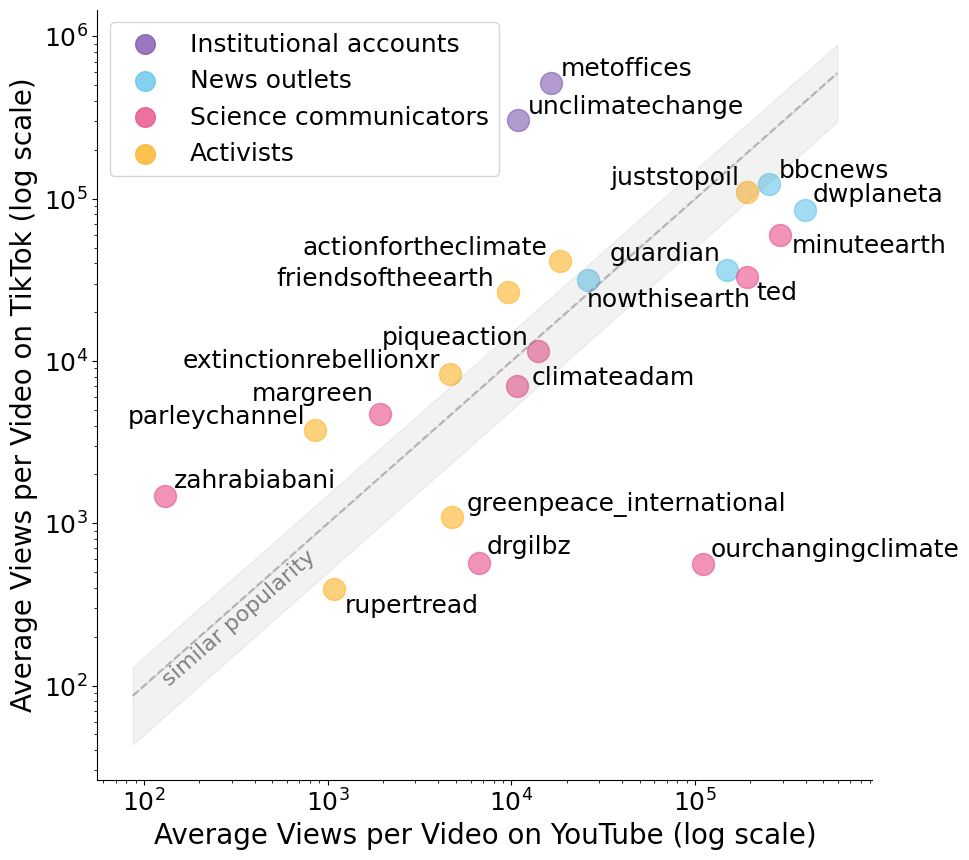

In [102]:
# plot avg_views_yt vs avg_views_tt, annotate with creator
fig, ax = plt.subplots(figsize=(10,10))

list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# log scale for both axes
ax.set_xscale("log")
ax.set_yscale("log")

# plot, color by popularity label
#ax.scatter(df_popularity["log_avg_views_yt"], df_popularity["log_avg_views_tt"], alpha=0.8, c=df_popularity["popularity_log_label"].map({"yt": "red", "tt": "blue", "similar": "grey"}), s=100)
ax.set_xlabel("Average Views per Video on YouTube (log scale)", fontsize=20)
ax.set_ylabel("Average Views per Video on TikTok (log scale)", fontsize=20)
#ax.set_title("Popularity of creators on YouTube and TikTok", fontsize=20)
for i, txt in enumerate(df_popularity["creator"]):
    # annotate with creator name in a readable way
    # scatter plot
    print(txt, df_popularity["popularity"][i])
    ax.scatter(df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i], alpha=0.6, c=list_colors[list_types.index(dict_type_creator[txt])], s=250, marker="o")
    if txt=="unclimatechange":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]+0.12*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="bbcnews":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]+0.12*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="ourchangingclimate":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]+0.1*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="ted":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]+0.12*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]-0.27*df_popularity["avg_views_tt"][i]))
    elif txt=="metoffices":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]+0.12*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="zahrabiabani":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]+0.12*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.12*df_popularity["avg_views_tt"][i]))
    elif txt=="rupertread":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]+0.15*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]-0.28*df_popularity["avg_views_tt"][i]))
    elif txt=="friendsoftheearth":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(df_popularity["avg_views_yt"][i]-0.945*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="parleychannel":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.095*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="actionfortheclimate":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.04*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="piqueaction":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.14*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="margreen":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.2*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.2*df_popularity["avg_views_tt"][i]))
    elif txt=="nowthisearth":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.99*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]-0.32*df_popularity["avg_views_tt"][i]))
    elif txt=="dwplaneta":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(1.1*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.14*df_popularity["avg_views_tt"][i]))
    elif txt=="greenpeace_international":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(1.2*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="guardian":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.23*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.15*df_popularity["avg_views_tt"][i]))
    elif txt=="extinctionrebellionxr":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.035*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.1*df_popularity["avg_views_tt"][i]))
    elif txt=="climateadam":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(1.2*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.03*df_popularity["avg_views_tt"][i]))
    elif txt=="drgilbz":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(1.1*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.15*df_popularity["avg_views_tt"][i]))
    elif txt=="minuteearth":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(1.15*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]-0.22*df_popularity["avg_views_tt"][i]))
    elif txt=="juststopoil":
        ax.annotate(txt, (df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]), fontsize=18, xytext=(0.18*df_popularity["avg_views_yt"][i], df_popularity["avg_views_tt"][i]+0.12*df_popularity["avg_views_tt"][i]))
# plot diagonal line
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color="grey", linestyle="--", alpha=0.5)

# increase size of x and y ticks
ax.tick_params(axis="both", which="major", labelsize=18)



# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)

plt.legend(loc="best", fontsize=18)

# add grey area around diagonal line
plt.fill_between(x, x, x*1.5, color="grey", alpha=0.1)
plt.fill_between(x, x, x*0.5, color="grey", alpha=0.1)

# annoptate along the diagonal line, in grey, with rotation 45 and text "similar popularity"
ax.annotate("similar popularity", (120, 100), fontsize=16, rotation=41, color="grey")

# remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# save figure as svg
fig.savefig("./popularity_log.svg", bbox_inches="tight")

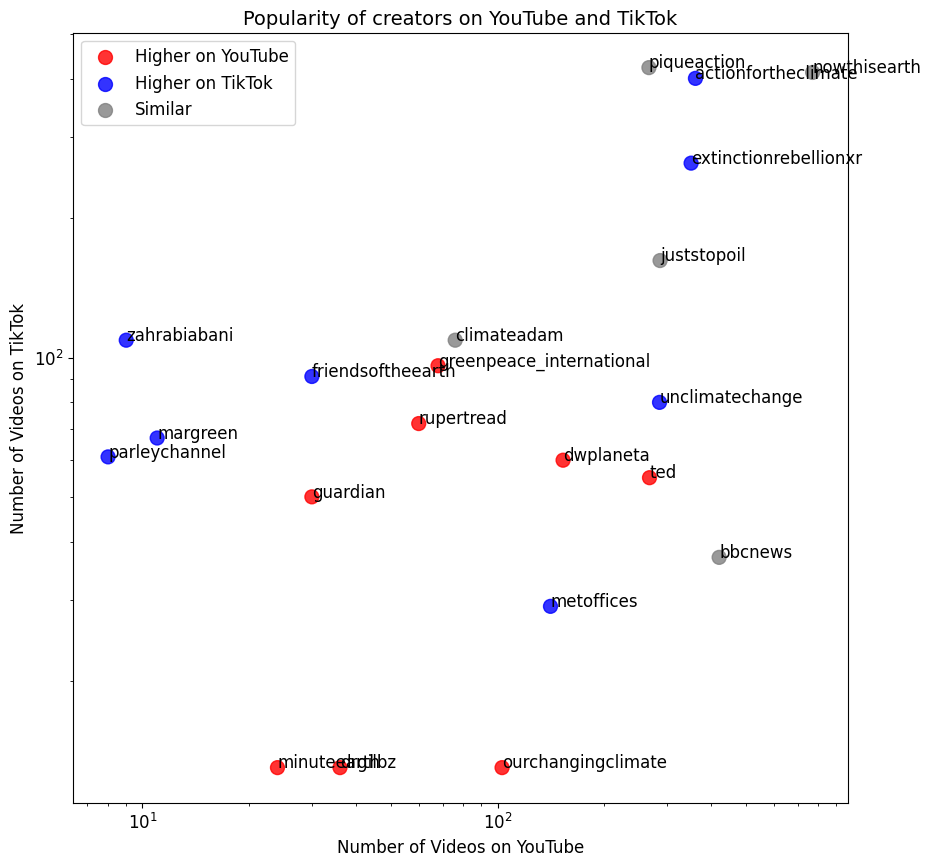

In [13]:
# plot popularity vs num_videos
fig, ax = plt.subplots(figsize=(10,10))

# log scale for both axes
ax.set_xscale("log")
ax.set_yscale("log")

# plot, color by popularity label
ax.scatter(df_popularity["num_videos_yt"], df_popularity["num_videos_tt"], alpha=0.8, c=df_popularity["popularity"].map({"yt": "red", "tt": "blue", "similar": "grey"}), s=100)
ax.set_xlabel("Number of Videos on YouTube", fontsize=12)
ax.set_ylabel("Number of Videos on TikTok", fontsize=12)
ax.set_title("Popularity of creators on YouTube and TikTok", fontsize=14)
for i, txt in enumerate(df_popularity["creator"]):
    # annotate with creator name in a readable way
    # scatter plot
    ax.annotate(txt, (df_popularity["num_videos_yt"][i], df_popularity["num_videos_tt"][i]), fontsize=12)

# increase size of x and y ticks
ax.tick_params(axis="both", which="major", labelsize=12)

# add legend with markers "o" and colors by empty scatter plots
ax.legend(handles=[plt.scatter([], [], color="red", marker="o", label="Higher on YouTube", alpha=0.8, s=100),
                    plt.scatter([], [], color="blue", marker="o", label="Higher on TikTok", alpha=0.8, s=100),
                    plt.scatter([], [], color="grey", marker="o", label="Similar", alpha=0.8, s=100)],
                    loc="best", fontsize=12)

plt.show()

In [ ]:
# plot popularity vs num_videos, take into account creator type
fig, ax = plt.subplots(figsize=(10,10))

# log scale for both axes
ax.set_xscale("log")
ax.set_yscale("log")

# plot, color by popularity label
ax.scatter(df_popularity["num_videos_yt"], df_popularity["num_videos_tt"], alpha=0.8, c=df_popularity["popularity"].map({"yt": "red", "tt": "blue", "similar": "grey"}), s=100)
ax.set_xlabel("Number of Videos on YouTube", fontsize=12)
ax.set_ylabel("Number of Videos on TikTok", fontsize=12)

In [64]:
# create dictionary with creator and ratio
dictionary_creator_ratio = {}
for i in range(len(df_popularity)):
    dictionary_creator_ratio[df_popularity["creator"].iloc[i]] = df_popularity["popularity"].iloc[i]

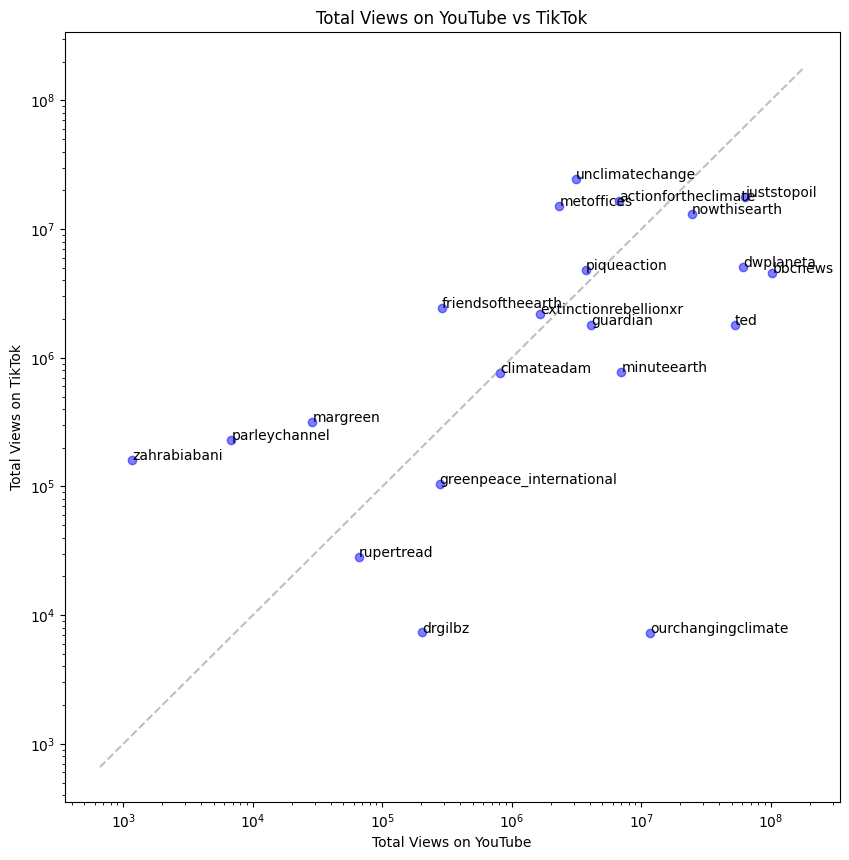

In [51]:
# plot avg_views_yt vs avg_views_tt, annotate with creator
fig, ax = plt.subplots(figsize=(10,10))
# log scale
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(df_popularity["total_views_yt"], df_popularity["total_views_tt"], color="blue", alpha=0.5)
ax.set_xlabel("Total Views on YouTube")
ax.set_ylabel("Total Views on TikTok")
ax.set_title("Total Views on YouTube vs TikTok")
for i, txt in enumerate(df_popularity["creator"]):
    ax.annotate(txt, (df_popularity["total_views_yt"][i], df_popularity["total_views_tt"][i]))


# plot diagonal line
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color="grey", linestyle="--", alpha=0.5)

# dictionary with "more_yt", "more_tt", "equal" according to position wrt diagonal line, given a relaxation of 50%
dictionary_more = {}
for i in range(len(df_popularity)):
    if df_popularity["total_views_yt"][i] > df_popularity["total_views_tt"][i] * 1.5:
        dictionary_more[df_popularity["creator"][i]] = "more_yt"
    elif df_popularity["total_views_yt"][i] * 1.5 < df_popularity["total_views_tt"][i]:
        dictionary_more[df_popularity["creator"][i]] = "more_tt"
    else:
        dictionary_more[df_popularity["creator"][i]] = "equal"
plt.show()

In [78]:
dictionary_creator_ratio

{'metoffices': 'tt',
 'unclimatechange': 'tt',
 'zahrabiabani': 'tt',
 'parleychannel': 'tt',
 'friendsoftheearth': 'tt',
 'actionfortheclimate': 'tt',
 'margreen': 'tt',
 'extinctionrebellionxr': 'tt',
 'nowthisearth': 'similar',
 'piqueaction': 'similar',
 'climateadam': 'similar',
 'bbcnews': 'similar',
 'juststopoil': 'similar',
 'rupertread': 'yt',
 'guardian': 'yt',
 'greenpeace_international': 'yt',
 'dwplaneta': 'yt',
 'minuteearth': 'yt',
 'ted': 'yt',
 'drgilbz': 'yt',
 'ourchangingclimate': 'yt'}

In [41]:
# number of elements in each category
print("more_yt:", len([i for i in dictionary_more.values() if i == "more_yt"]))
print("more_tt:", len([i for i in dictionary_more.values() if i == "more_tt"]))
print("equal:", len([i for i in dictionary_more.values() if i == "equal"]))

more_yt: 11
more_tt: 7
equal: 3


In [126]:
dictionary_creator_ratio

{'metoffices': 'tt',
 'unclimatechange': 'tt',
 'zahrabiabani': 'tt',
 'parleychannel': 'tt',
 'friendsoftheearth': 'tt',
 'actionfortheclimate': 'tt',
 'margreen': 'tt',
 'extinctionrebellionxr': 'tt',
 'nowthisearth': 'similar',
 'piqueaction': 'similar',
 'climateadam': 'similar',
 'bbcnews': 'similar',
 'juststopoil': 'similar',
 'rupertread': 'yt',
 'guardian': 'yt',
 'greenpeace_international': 'yt',
 'dwplaneta': 'yt',
 'minuteearth': 'yt',
 'ted': 'yt',
 'drgilbz': 'yt',
 'ourchangingclimate': 'yt'}

In [127]:
# export dictionary
with open("dictionary_popularity.pkl", "wb") as f:
    pickle.dump(dictionary_creator_ratio, f)

## N. comments

In [4]:
# for each creator, open comments files and get number of comments
# dictionary with creator and number of comments
n_comments_yt = 0
n_comments_tt = 0
for creator in dictionary_channelid.keys():
    print("Creator:", creator)
    # open json file
    with open(data_dir_yt+"comments/{}_comments_2021-2023.json".format(creator), "r") as f:
        comments_yt = json.load(f)
    # each element is a video, get number of comments
    for video in comments_yt:
        n_comments_yt += len(video["Comments"])

    # open json file
    with open(data_dir_tt+"comments/creators/all_comments_{}.json".format(creator), "r") as f:
        comments_tt = json.load(f)

    n_comments_tt += len(comments_tt)

print("Total number of comments on YT:", n_comments_yt)
print("Total number of comments on TT:", n_comments_tt)


Creator: unclimatechange
Creator: bbcnews
Creator: climateadam
Creator: drgilbz
Creator: dwplaneta
Creator: extinctionrebellionxr
Creator: greenpeace_international
Creator: guardian
Creator: ourchangingclimate
Creator: ted
Creator: juststopoil
Creator: minuteearth
Creator: metoffices
Creator: zahrabiabani
Creator: rupertread
Creator: friendsoftheearth
Creator: parleychannel
Creator: actionfortheclimate
Creator: piqueaction
Creator: margreen
Creator: nowthisearth
Total number of comments on YT: 492788
Total number of comments on TT: 81750
